In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from ipywidgets import interact
import statsmodels.formula.api as smf
import plotly.express as px
import os

data_path = os.path.join('.', 'ms_data.csv')
data = pd.read_csv(data_path)

#Ensure correct data types
data['visit_date'] = pd.to_datetime(data['visit_date'])
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['walking_speed'] = pd.to_numeric(data['walking_speed'], errors='coerce')

#Set style for plots
sns.set(style="whitegrid")

<Figure size 1000x600 with 0 Axes>

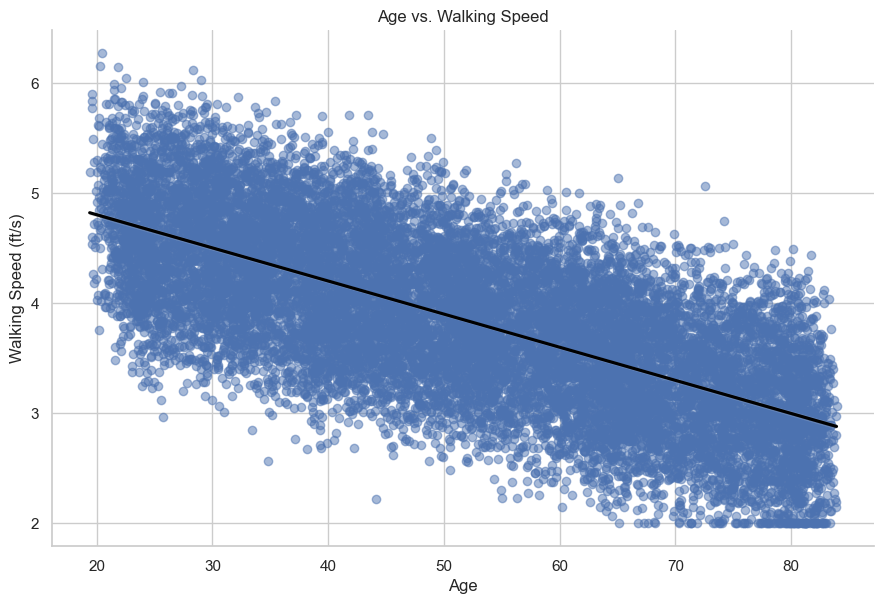

In [2]:
#1A Scatter plot with regression line for age vs walking speed
plt.figure(figsize=(10, 6))
sns.lmplot(data=data, x='age', y='walking_speed', aspect=1.5, height=6, scatter_kws={'alpha':0.5}, line_kws={'color': 'black'})
plt.title("Age vs. Walking Speed")
plt.xlabel("Age")
plt.ylabel("Walking Speed (ft/s)")
plt.show()


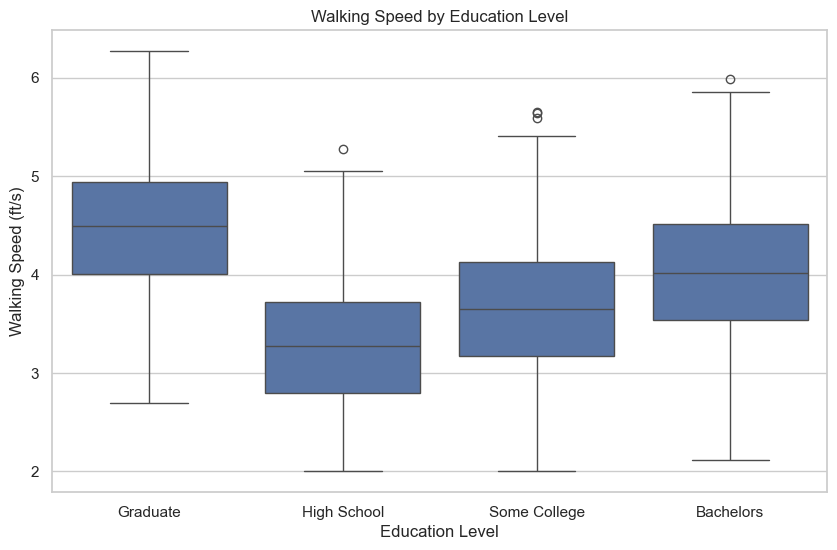

In [3]:
#1B Box plot for walking speed by education level
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='education_level', y='walking_speed')
plt.title("Walking Speed by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Walking Speed (ft/s)")
plt.show()


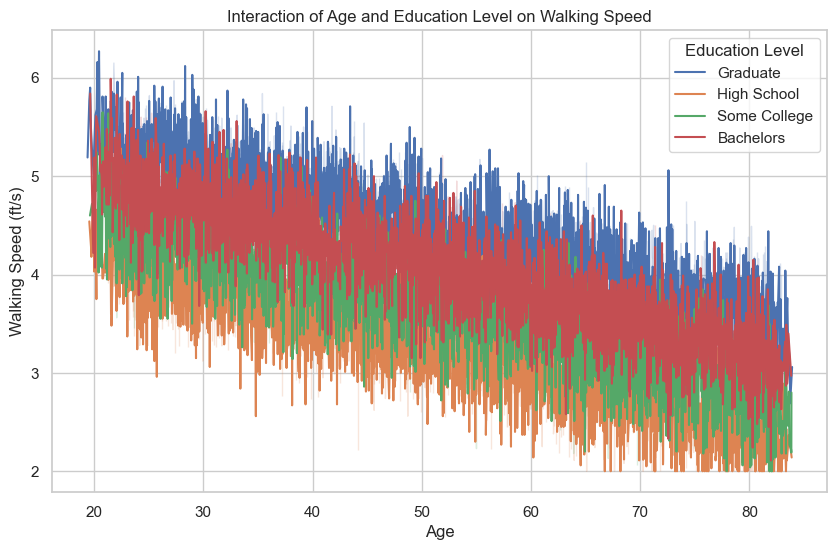

In [4]:
#1C Line plot for age vs walking speed by education level
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='age', y='walking_speed', hue='education_level', estimator='mean')
plt.title("Interaction of Age and Education Level on Walking Speed")
plt.xlabel("Age")
plt.ylabel("Walking Speed (ft/s)")
plt.legend(title="Education Level")
plt.show()


/var/folders/91/318xx77d4wbb95s3dsdtsshc0000gq/T/ipykernel_63182/2355829596.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='insurance_type', y='visit_cost', data=mean_cost, ci=None)


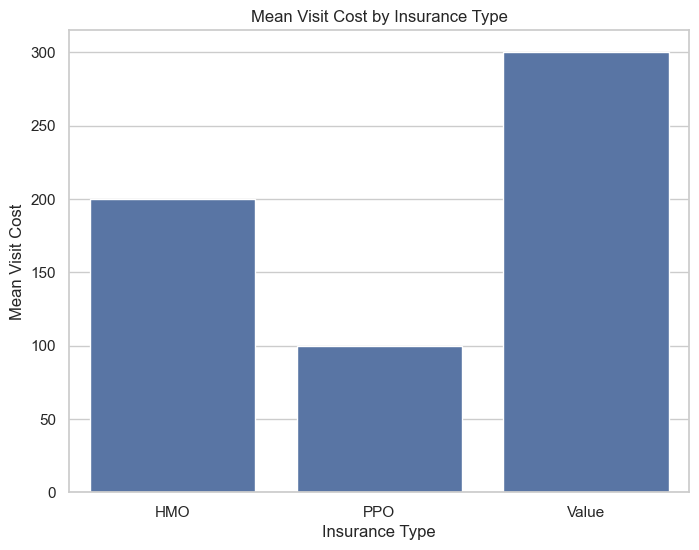

In [5]:
#2A Boxplot mean visit cost by insurance type
plt.figure(figsize=(8, 6))
mean_cost = data.groupby('insurance_type')['visit_cost'].mean().reset_index()
sns.barplot(x='insurance_type', y='visit_cost', data=mean_cost, ci=None)
plt.title("Mean Visit Cost by Insurance Type")
plt.xlabel("Insurance Type")
plt.ylabel("Mean Visit Cost")
plt.show()


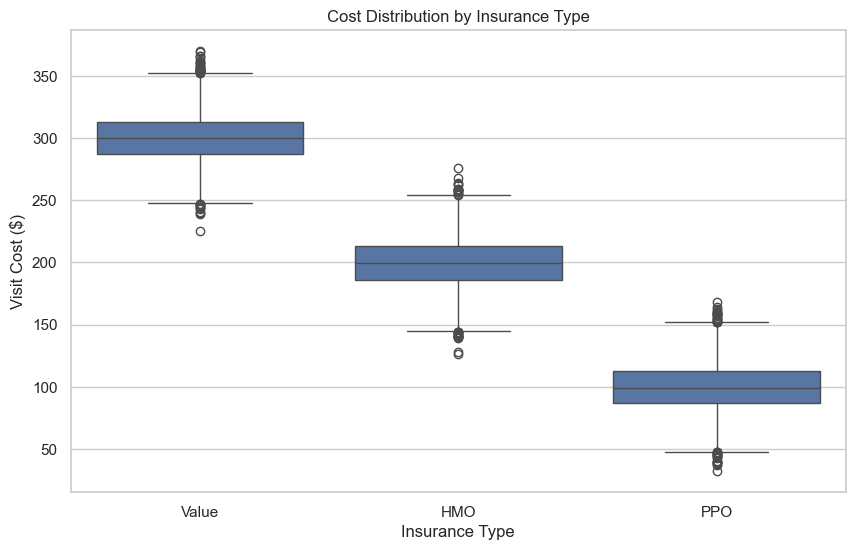

In [6]:
#2B Box plot for cost distributions by insurance type with error bars
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='insurance_type', y='visit_cost')
plt.title("Cost Distribution by Insurance Type")
plt.xlabel("Insurance Type")
plt.ylabel("Visit Cost ($)")
plt.show()


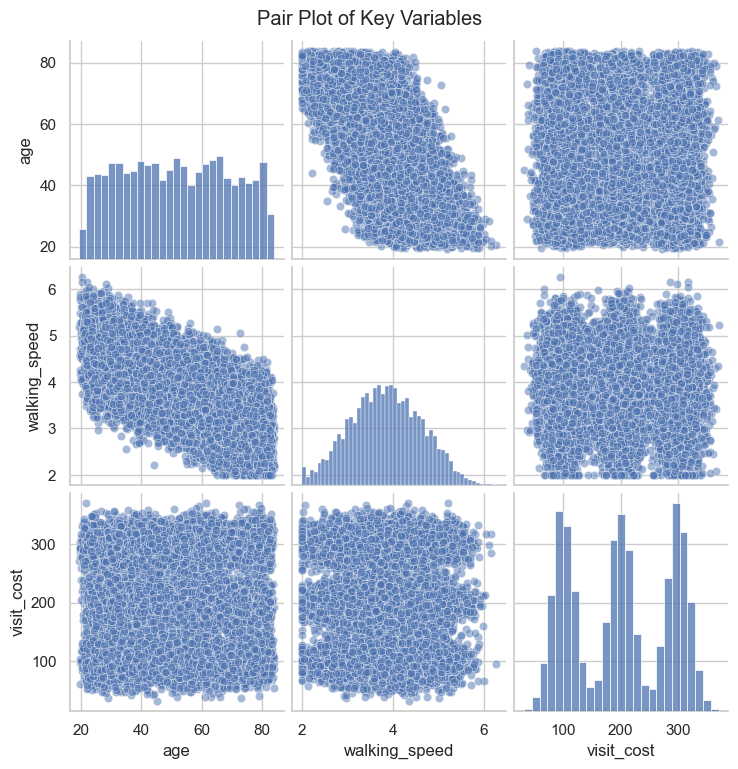

In [7]:
#3A Pair plot for age, walking speed, and visit cost
sns.pairplot(data[['age', 'walking_speed', 'visit_cost']], kind="scatter", plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Key Variables", y=1.02)
plt.show()


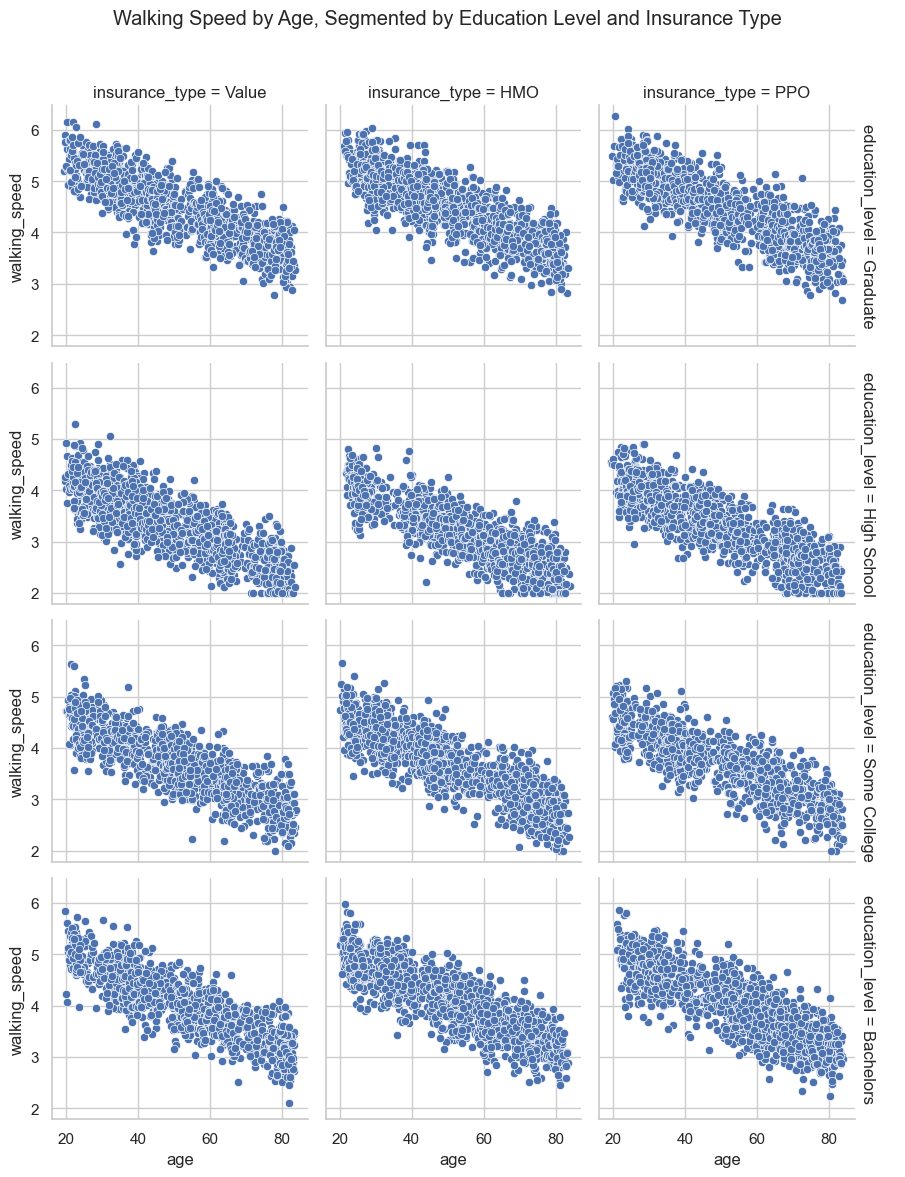

In [8]:
#3B Facet grid of age vs. walking speed by insurance and education level
g = sns.FacetGrid(data, col="insurance_type", row="education_level", margin_titles=True, height=3)
g.map(sns.scatterplot, "age", "walking_speed")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Walking Speed by Age, Segmented by Education Level and Insurance Type")
plt.show()


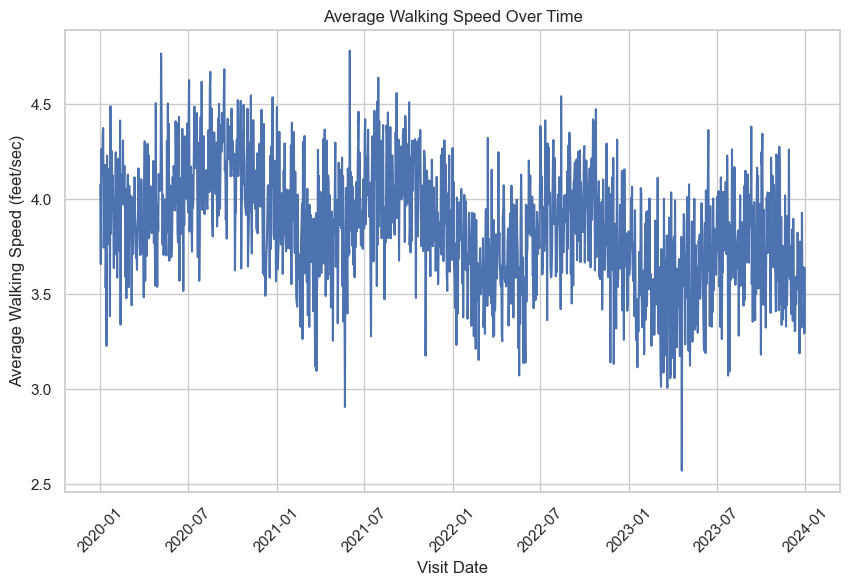

In [9]:
#3C.1 Calculate the average walking speed at each visit date
avg_walking_speed = data.groupby('visit_date')['walking_speed'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='visit_date', y='walking_speed', data=avg_walking_speed)
plt.title("Average Walking Speed Over Time")
plt.xlabel("Visit Date")
plt.ylabel("Average Walking Speed (feet/sec)")
plt.xticks(rotation=45)
plt.show()


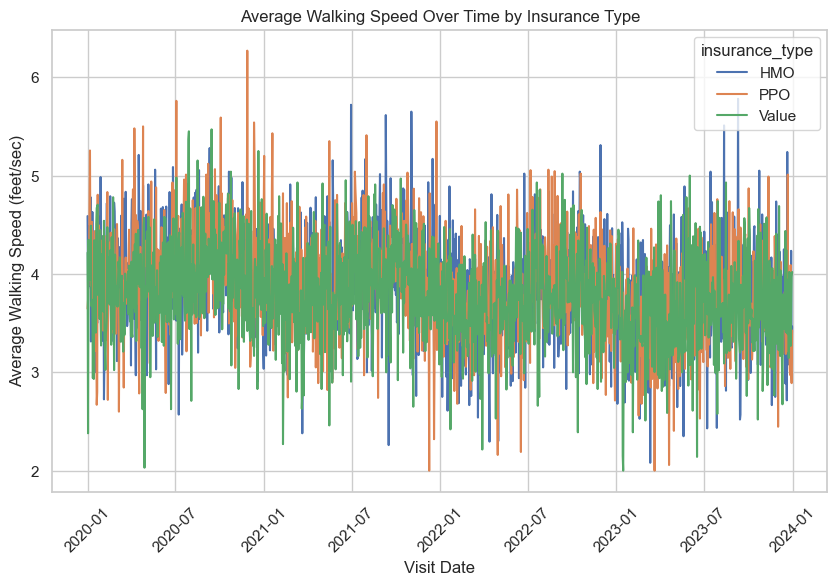

In [10]:
#3C.2 Calculate the average walking speed over time for each insurance type
avg_speed_by_insurance = data.groupby(['visit_date', 'insurance_type'])['walking_speed'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='visit_date', y='walking_speed', hue='insurance_type', data=avg_speed_by_insurance)
plt.title("Average Walking Speed Over Time by Insurance Type")
plt.xlabel("Visit Date")
plt.ylabel("Average Walking Speed (feet/sec)")
plt.xticks(rotation=45)
plt.show()


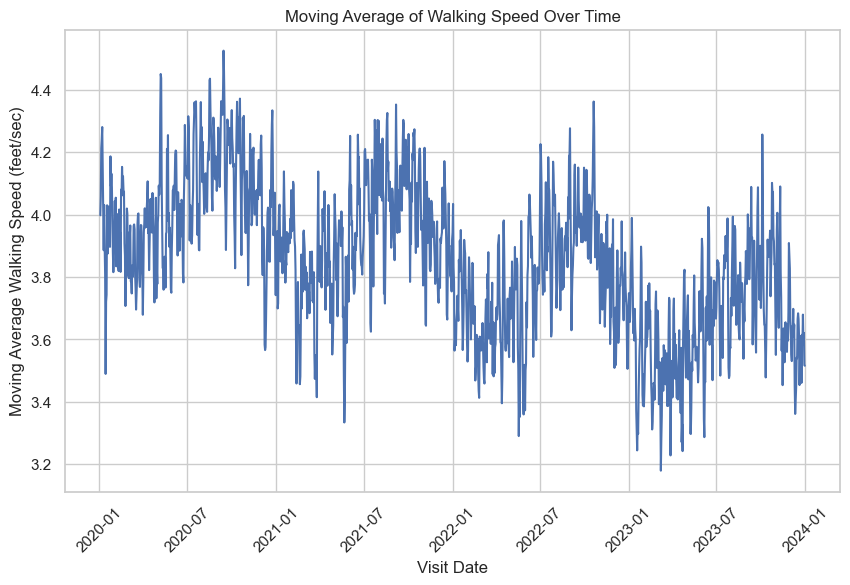

In [11]:
#3C.3 Calculate the moving average for average walking speed
avg_walking_speed['moving_avg'] = avg_walking_speed['walking_speed'].rolling(window=3).mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x='visit_date', y='moving_avg', data=avg_walking_speed)
plt.title("Moving Average of Walking Speed Over Time")
plt.xlabel("Visit Date")
plt.ylabel("Moving Average Walking Speed (feet/sec)")
plt.xticks(rotation=45)
plt.show()


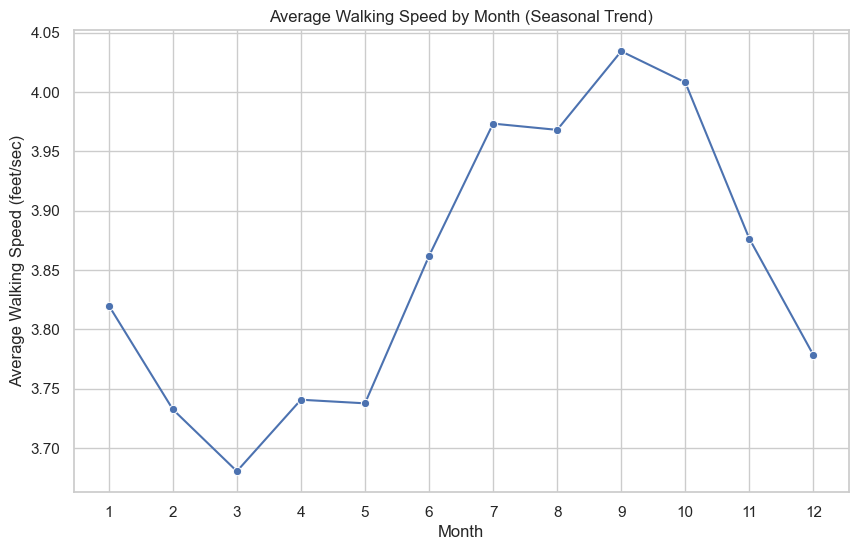

In [12]:
#3C.4 Extract month from visit_date
data['month'] = data['visit_date'].dt.month

#Calculate average walking speed by month
avg_speed_by_month = data.groupby('month')['walking_speed'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='walking_speed', data=avg_speed_by_month, marker='o')
plt.title("Average Walking Speed by Month (Seasonal Trend)")
plt.xlabel("Month")
plt.ylabel("Average Walking Speed (feet/sec)")
plt.xticks(range(1, 13))
plt.show()


<h2>Bonus Questions<h2>

In [13]:
#Mixed-effects model to assess walking speed with random intercepts for each patient
mixed_model = smf.mixedlm("walking_speed ~ age + insurance_type + education_level", data, groups="patient_id")
mixed_result = mixed_model.fit()
print(mixed_result.summary())


/Users/hteshome/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/hteshome/anaconda3/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/hteshome/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/hteshome/anaconda3/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/hteshome/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

                   Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      walking_speed
No. Observations:        15389        Method:                  REML         
No. Groups:              1000         Scale:                   0.1151       
Min. group size:         12           Log-Likelihood:          -5333.5235   
Max. group size:         18           Converged:               No           
Mean group size:         15.4                                               
----------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z| [0.025 0.975]
----------------------------------------------------------------------------
Intercept                        5.616    0.012  475.884 0.000  5.593  5.639
insurance_type[T.PPO]           -0.003    0.007   -0.432 0.666 -0.018  0.011
insurance_type[T.Value]         -0.003    0.007   -0.461 0.645 -0.018  0.011
education_level[T.G

In [14]:
#Interaction analysis between age and insurance_type on walking_speed
interaction_model = smf.ols("walking_speed ~ age * insurance_type", data=data).fit()
print(interaction_model.summary())


                            OLS Regression Results                            
Dep. Variable:          walking_speed   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     2818.
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        02:36:14   Log-Likelihood:                -12878.
No. Observations:               15389   AIC:                         2.577e+04
Df Residuals:                   15383   BIC:                         2.581e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [15]:
#Interactive line plot of average walking speed over time by insurance type
fig = px.line(avg_speed_by_insurance, x="visit_date", y="walking_speed", color="insurance_type",
              title="Average Walking Speed Over Time by Insurance Type")
fig.update_layout(xaxis_title="Visit Date", yaxis_title="Average Walking Speed (feet/sec)")
fig.show()


/Users/hteshome/anaconda3/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [16]:
#Mixed effects model with interaction between age and education level
interaction_model = smf.mixedlm("walking_speed ~ age * education_level", data, groups=data["patient_id"])
interaction_result = interaction_model.fit(method='lbfgs')  # Use 'lbfgs' optimizer if convergence is an issue
print(interaction_result.summary())


/Users/hteshome/anaconda3/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning:

Random effects covariance is singular

/Users/hteshome/anaconda3/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning:

The MLE may be on the boundary of the parameter space.



                     Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       walking_speed
No. Observations:         15389         Method:                   REML         
No. Groups:               1000          Scale:                    0.1162       
Min. group size:          12            Log-Likelihood:           -5312.6764   
Max. group size:          18            Converged:                Yes          
Mean group size:          15.4                                                 
-------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------
Intercept                            5.627    0.017 327.098 0.000  5.594  5.661
education_level[T.Graduate]          0.377    0.024  15.543 0.000  0.329  0.424
education_level[T.High School]      -0.838    0.024 -34.722 0

In [17]:
#Creating a binary outcome variable for high walking speed
data['high_speed'] = (data['walking_speed'] > data['walking_speed'].median()).astype(int)

#Logistic regression for high vs. low walking speed
logit_model = smf.logit("high_speed ~ age + education_level + insurance_type", data).fit()
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.303189
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             high_speed   No. Observations:                15389
Model:                          Logit   Df Residuals:                    15382
Method:                           MLE   Df Model:                            6
Date:                Wed, 13 Nov 2024   Pseudo R-squ.:                  0.5626
Time:                        02:36:20   Log-Likelihood:                -4665.8
converged:                       True   LL-Null:                       -10666.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           9.0296      0.166     54.355  

In [18]:
#Interactive scatter plot of age vs walking speed by education level
fig = px.scatter(data, x='age', y='walking_speed', color='education_level', 
                 title="Interactive Scatter Plot of Age vs Walking Speed",
                 hover_data=['insurance_type', 'visit_cost'])
fig.update_traces(marker=dict(size=7, opacity=0.7))
fig.show()


In [19]:
#Interactive box plot for visit cost by insurance type
fig = px.box(data, x="insurance_type", y="visit_cost", color="insurance_type",
             title="Interactive Box Plot of Visit Cost by Insurance Type")
fig.show()


In [20]:
#Interactive slider to filter data by age 
def plot_scatter(age_threshold):
    filtered_data = data[data['age'] >= age_threshold]
    sns.scatterplot(x='age', y='walking_speed', data=filtered_data)
    plt.title(f'Scatter Plot of Walking Speed for Age >= {age_threshold}')
    plt.xlabel("Age")
    plt.ylabel("Walking Speed (ft/s)")
    plt.show()

interact(plot_scatter, age_threshold=(data['age'].min(), data['age'].max(), 1))


interactive(children=(FloatSlider(value=51.4, description='age_threshold', max=83.91, min=19.4, step=1.0), Out…

<function __main__.plot_scatter(age_threshold)>